In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_data = pd.read_csv('train.csv')

In [3]:
read_data.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [4]:
read_data.shape

(2834, 6)

In [5]:
read_data.isnull().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

In [6]:
read_data = read_data.drop(['id','url_legal','license'], axis=1)

In [7]:
read_data.head()

,excerpt,target,standard_error
0,When the young people returned to the ballroom...,-0.340259,0.464009
1,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,And outside before the palace a great garden w...,-1.054013,0.450007
4,Once upon a time there were Three Bears who li...,0.247197,0.510845


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='standard_error', ylabel='Density'>

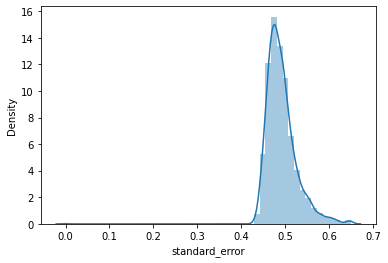

In [8]:
sns.distplot(read_data['standard_error'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='standard_error'>

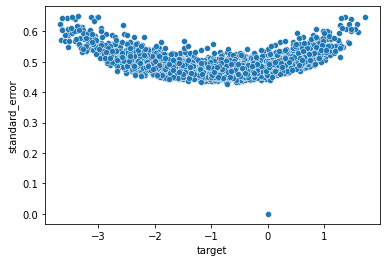

In [9]:
sns.scatterplot(read_data['target'],read_data['standard_error'])

In [10]:
read_data['excerpt'] = read_data['excerpt'].apply(lambda x: x.lower())

In [11]:
read_data.head()

,excerpt,target,standard_error
0,when the young people returned to the ballroom...,-0.340259,0.464009
1,"all through dinner time, mrs. fayre was somewh...",-0.315372,0.480805
2,"as roger had predicted, the snow departed as q...",-0.580118,0.476676
3,and outside before the palace a great garden w...,-1.054013,0.450007
4,once upon a time there were three bears who li...,0.247197,0.510845


In [12]:
import string
def rev_punc(rev):
    data_rev = ''.join(i for i in rev if i not in string.punctuation)
    return data_rev

In [13]:
read_data['excerpt'] = read_data['excerpt'].apply(lambda x: rev_punc(x))

In [14]:
read_data.head()

,excerpt,target,standard_error
0,when the young people returned to the ballroom...,-0.340259,0.464009
1,all through dinner time mrs fayre was somewhat...,-0.315372,0.480805
2,as roger had predicted the snow departed as qu...,-0.580118,0.476676
3,and outside before the palace a great garden w...,-1.054013,0.450007
4,once upon a time there were three bears who li...,0.247197,0.510845


In [15]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [16]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
read_data['excerpt'] = read_data['excerpt'].apply(lambda x: ' '.join([i for i in x.split() if i not in (sw)]))

In [18]:
read_data['excerpt'].head()

0    young people returned ballroom presented decid...
1    dinner time mrs fayre somewhat silent eyes res...
2    roger predicted snow departed quickly came two...
3    outside palace great garden walled round fille...
4    upon time three bears lived together house woo...
Name: excerpt, dtype: object

In [19]:
read_data['excerpt'] = read_data['excerpt'].replace('[^\w\s\]','')

In [20]:
read_data['excerpt'] = read_data['excerpt'].replace('\d','')

In [21]:
from nltk import WordNetLemmatizer
word = WordNetLemmatizer()

In [24]:
read_data['excerpt'] = read_data['excerpt'].apply(lambda x: word.lemmatize(x))

In [25]:
read_data.head()

,excerpt,target,standard_error
0,young people returned ballroom presented decid...,-0.340259,0.464009
1,dinner time mrs fayre somewhat silent eyes res...,-0.315372,0.480805
2,roger predicted snow departed quickly came two...,-0.580118,0.476676
3,outside palace great garden walled round fille...,-1.054013,0.450007
4,upon time three bears lived together house woo...,0.247197,0.510845


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer()

In [30]:
x = cv.fit_transform(read_data['excerpt'])

In [31]:
y = read_data['target']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [38]:
mean_squared_error(y_pred,y_test)

0.706173657775419

In [45]:
import wordcloud
from wordcloud import WordCloud

In [46]:
text = ''.join(i for i in read_data['excerpt'])

In [47]:
cloud = WordCloud(collocations=False, background_color='black').generate(text)

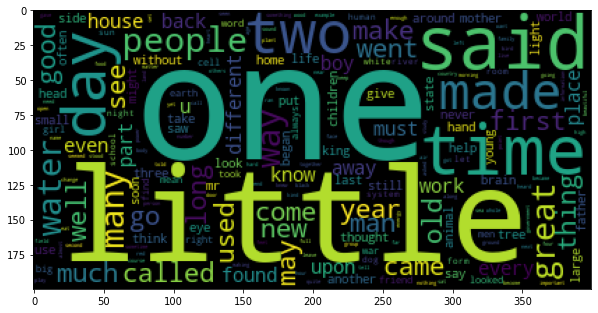

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.show()